# COMP7103B Assignment 1 Clustering

Lee Chung Ho (3036030037)

**Question 1**

In [1]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import random
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize, StandardScaler

In [2]:
# data_original = pd.read_csv(r'/Users/dannylee/Desktop/HKU/22-23 SEM2/Data Mining/assignment/Assignment1/Exercise/clustering_data.csv', index_col='StockName')
data_original = pd.read_csv(r'C:\Users\user\Desktop\HKU\22-23 SEM2\Data Mining\assignment\Assignment1\Exercise\clustering_data.csv', index_col='StockName')

In [3]:
# data_original

In [4]:
data = data_original.copy()

Dataset is standardized before clustering. This is to improve the Kmeans clustering results.

In [5]:
# standardise the data
scaler = StandardScaler()
data = scaler.fit(data).transform(data)

In [6]:
# data = normalize(data_original, axis=1)

In [7]:
data = pd.DataFrame(data, columns=data_original.columns, index=data_original.index)

In [8]:
data

,1/28/2011,4/29/2011,5/20/2011,4/1/2011,5/27/2011,6/17/2011,4/15/2011,2/18/2011,3/18/2011,3/11/2011,...,1/14/2011,4/8/2011,4/21/2011,3/4/2011,3/25/2011,2/4/2011,1/7/2011,2/25/2011,5/13/2011,1/21/2011
StockName,,,,,,,,,,,,,,,,,,,,,
American Express,-1.756451,0.697116,1.775624,-0.666143,-0.000712,0.656237,0.175511,-1.985495,0.921050,1.272884,...,1.175106,0.837919,0.305197,0.098939,0.198532,-1.291030,0.692237,-0.753184,-0.347879,-0.118178
Boeing,-1.100160,1.437573,-0.342522,-0.074650,-0.123554,0.904528,-0.261408,-0.359167,-0.854743,0.716244,...,-0.136783,-0.030756,0.697238,-0.487688,1.481034,0.443272,1.572441,0.526513,0.008852,0.532144
Chevron,0.018323,-0.235162,0.490507,0.528517,0.815630,-0.648811,-0.909847,1.621141,2.376946,-1.802403,...,0.263956,0.567909,0.416581,1.048897,0.685257,0.633459,-0.378123,1.761572,-0.209062,0.397332
Cisco Systems,0.434661,0.463663,-0.458247,-1.452563,-0.294724,-0.814393,-1.148927,-0.641885,-1.273921,-0.696759,...,-0.011654,2.317729,-0.640114,-0.654902,-0.959490,1.498692,0.726490,0.354935,-1.514586,-1.337066
DuPont,1.865382,-0.213928,0.267673,0.632474,0.504122,-0.681375,-0.108558,1.250911,0.398394,-0.687494,...,0.632011,-0.226146,0.405890,-0.306166,-0.488782,1.219699,-0.402220,-0.112562,-1.508687,-1.350962
Kraft,-0.904950,-0.912598,0.738977,-0.001080,-0.886512,0.999569,2.151438,-0.144468,-0.236705,0.955594,...,0.024403,-0.191281,0.016393,-0.376904,0.033073,0.028928,-0.841559,1.899363,1.619693,-0.185130
Caterpillar,1.605358,1.434535,-0.344766,1.323429,1.576681,-0.741273,-0.676281,0.836397,1.756481,-1.347677,...,-0.164445,-2.339081,0.656417,0.316499,0.287893,0.691367,-0.441727,-0.582162,-1.662789,-0.880164
Bank of America,-1.674383,-1.246165,-0.830058,-0.653826,0.727724,-1.341175,-1.589161,-0.770418,-0.183907,1.552430,...,2.232552,0.275313,-1.659228,-0.570082,-3.934005,0.982245,0.851319,0.033290,-1.125076,-3.011683
Verizon,1.160463,-0.240821,0.143374,1.042579,-0.625776,0.439668,0.360140,-0.095892,0.711317,0.203359,...,-1.525532,-1.466303,-1.505585,0.149902,0.115917,-0.100982,-0.323081,0.244615,0.144807,-0.730100


In [9]:
# data.iloc[0:1].transpose().sum()

In [10]:
np.random.seed(3603003)
kmeans = KMeans(n_clusters=8, init='random').fit(data)

In [11]:
# kmeans.labels_

In [12]:
Clusters = pd.DataFrame()
Clusters['StockName'] = data.index
Clusters['cluster'] = kmeans.labels_
# Clusters

In [13]:
# kmeans.cluster_centers_

In [14]:
print(f'After standard scaling the dataset, the SSE of the kmeans clustering is {kmeans.inertia_}')

After standard scaling the dataset, the SSE of the kmeans clustering is 377.60272680510315


**Question 2**

In the lecture, we have discussed that we can run multiple times of kmeans alogorithm to improve the SSE.  
We can tune the parameter n_init to change the Number of times the k-means algorithm is run with different centroid seeds.  

In [15]:
init_number = []
init_SSE = []
for x in range(1,201):
    np.random.seed(3603003)
    kmeans = KMeans(n_clusters=8, init='random', n_init = x).fit(data)
    init_number.append(x)
    init_SSE.append(kmeans.inertia_)
min(init_SSE)

357.70015219714486

In [16]:
df = pd.DataFrame()
df['init_number'] = init_number
df['init_SSE'] = init_SSE
min(df[df['init_SSE']<358].init_number)

199

With n_init=199, SSE is lowered from 377.60 to 357.70

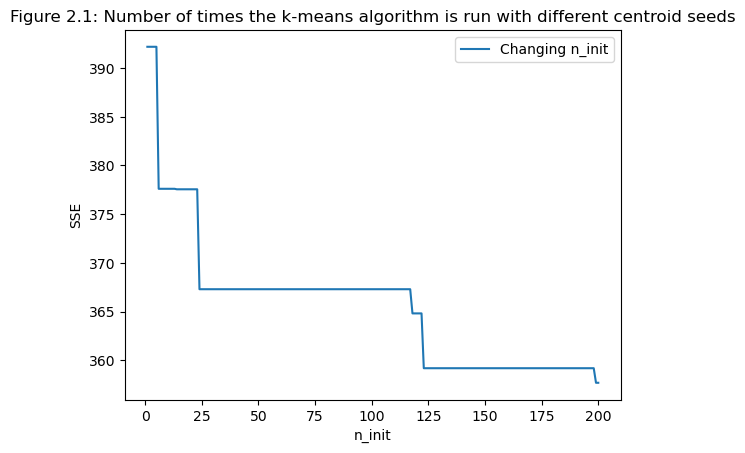

In [17]:
plt.plot(init_number, init_SSE, label = "Changing n_init")
plt.xlabel("n_init")
plt.ylabel("SSE")
plt.legend()
plt.title("Figure 2.1: Number of times the k-means algorithm is run with different centroid seeds")
plt.show()

Then we can change the initialization method of the algorithm to improve the selection of initial centroid.  
Kmeans++ is used as an init method.

In [18]:
init_number = []
plus_SSE = []
for x in range(1,201):
    np.random.seed(3603003)
    kmeans = KMeans(n_clusters=8, init='k-means++', n_init = x).fit(data)
    init_number.append(x)
    plus_SSE.append(kmeans.inertia_)
min(plus_SSE)

352.9582648921403

In [19]:
df = pd.DataFrame()
df['init_number'] = init_number
df['plus_SSE'] = plus_SSE
min(df[df['plus_SSE']<353].init_number)

80

With n_init=80, method=kmeans++, SSE is lowered from 357.70 to 352.96

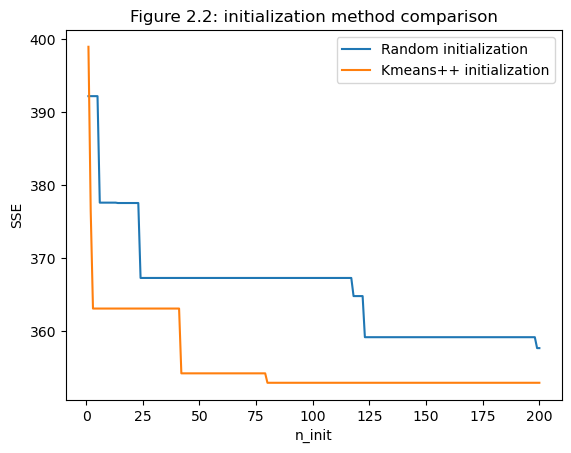

In [20]:
plt.plot(init_number, init_SSE, label = "Random initialization")
plt.plot(init_number, plus_SSE, label = "Kmeans++ initialization")
plt.xlabel("n_init")
plt.ylabel("SSE")
plt.legend()
plt.title("Figure 2.2: initialization method comparison")
plt.show()

Then we look into the other tunable parameters in the Kmeans function, such as max iteration and tolerance.

In [21]:
max_iter = []
iter_SSE = []
for x in range(100,1001,10):
    np.random.seed(3603003)
    kmeans = KMeans(n_clusters=8, init='k-means++', n_init = 80, max_iter = x).fit(data)
    max_iter.append(x)
    iter_SSE.append(kmeans.inertia_)
min(iter_SSE)

352.9582648921403

No great improvement by changing max_iter

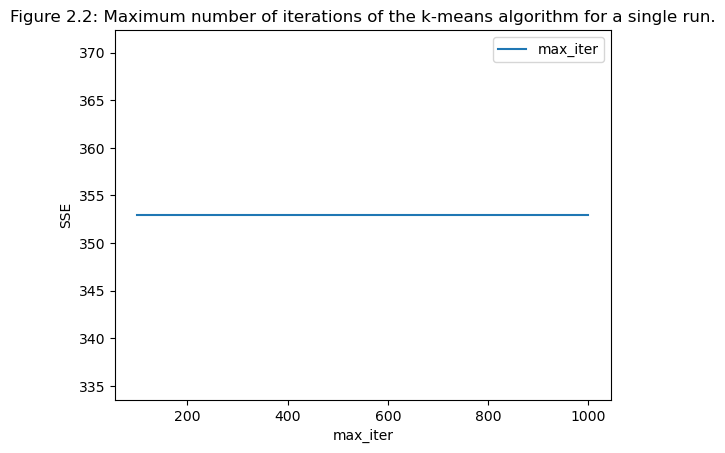

In [22]:
plt.plot(max_iter, iter_SSE, label = "max_iter")
plt.xlabel("max_iter")
plt.ylabel("SSE")
plt.legend()
plt.title("Figure 2.2: Maximum number of iterations of the k-means algorithm for a single run.")
plt.show()

In [23]:
y = [10**x for x in range(-10,-1,1)]

In [24]:
tol = []
tol_SSE = []
for x in y:
    np.random.seed(3603003)
    kmeans = KMeans(n_clusters=8, init='k-means++', n_init = 80, tol = x).fit(data)
    tol.append(x)
    tol_SSE.append(kmeans.inertia_)
min(iter_SSE)

352.9582648921403

No great improvement by changing tolerance

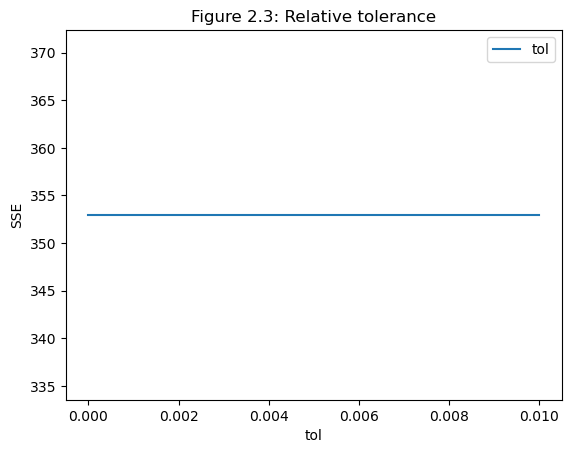

In [25]:
plt.plot(tol, tol_SSE, label = "tol")
plt.xlabel("tol")
plt.ylabel("SSE")
plt.legend()
plt.title("Figure 2.3: Relative tolerance")
plt.show()

In [26]:
np.random.seed(3603003)
kmeans = KMeans(n_clusters=8, init='k-means++',copy_x = False, n_init = 80).fit(data)
kmeans.inertia_

352.9582648921403

In [27]:
np.random.seed(3603003)
kmeans = KMeans(n_clusters=8, init='k-means++',algorithm = "elkan", n_init = 80).fit(data)
kmeans.inertia_

352.9582648921403

Among all parameters, initialization method and Number of times run with different centroid seeds affects the SSE most.  

(a)  
1. With K-means++, initial centroid selection is improved by selecting them in a probabilistic way where a the probability of a point being selected as the initial centroid depends on its squared distance will all other points. Initial centroids are more likely to be selected in different regions instead of selected closely. This could improve the clustering and thus the SSE.  
2. With an increase in Number of times run with different centroid seeds, k-means is run for more times, and the best of the clusterings is selected. So, there is a higher probability of selecting better initial centroids with more runs.  

(b)  
1. Not applicable for increasing or decreasing.  
2. Referring to figure 2.1 above, the SSE decreases significantly initially. But after reaching >80 initial centroid, the decrease is not obivious. The increase of n_init will not always improve the results.  

**Question 3**

In [28]:
np.random.seed(3603003)
kmeans = KMeans(n_clusters=8, init='k-means++', n_init = 80).fit(data)
kmeans.inertia_

352.9582648921403

In [29]:
kmeans.labels_

array([1, 1, 2, 6, 4, 3, 4, 0, 3, 1, 1, 1, 1, 3, 4, 1, 5, 1, 1, 3, 3, 7,
       1, 2, 1, 2, 3, 3, 1, 3])

In [30]:
data.index

Index(['American Express', 'Boeing', 'Chevron', 'Cisco Systems', 'DuPont',
       'Kraft', 'Caterpillar', 'Bank of America', 'Verizon', 'Microsoft',
       'IBM', 'The Home Depot', 'Walt Disney', 'Procter & Gamble', 'Alcoa',
       'Intel', 'Hewlett-Packard', 'Wal-Mart', 'General Electric', 'AT&T',
       'Merck', 'Pfizer', 'United Technologies', 'ExxonMobil', 'Travelers',
       'JPMorgan Chase', 'McDonalds', 'Coca-Cola', '3M', 'Johnson & Johnson'],
      dtype='object', name='StockName')

In [31]:
Sector = ['Financial Sevices', 'Commercial Airplanes, Defense', 'integrated energy and chemicals', 'networking and communication products', 'technology-based materials and solutions', 
          'food and beverage', 'construction and mining equipment', 'Financial Sevices', 'communications, technology, information', 'software, devices, and solutions', 
          'Software, Consulting, Infrastructure', 'building materials', 'mass media and entertainment', 'Beauty; Grooming; Health Care; Fabric', 'aluminum', 
          'computing and related products', 'information technology', 'retail', 'aviation, power, renewable energy, digital industry', 'telecommunications, media', 
          'Healthcare, Life Sciences and Electronics', 'biopharmaceutical products', 'high-technology systems building, aerospace', 'crude oil and natural gas', 'insurance products', 
          'Financial Sevices', 'food and beverage', 'food and beverage', 'Health Care and Consumer', 'healthcare'
         ]

In [32]:
Clusters = pd.DataFrame()
Clusters['StockName'] = data.index
Clusters['cluster'] = kmeans.labels_
Clusters['Sector'] = Sector
Clusters.sort_values(by=["cluster"])

,StockName,cluster,Sector
7,Bank of America,0,Financial Sevices
0,American Express,1,Financial Sevices
15,Intel,1,computing and related products
28,3M,1,Health Care and Consumer
22,United Technologies,1,"high-technology systems building, aerospace"
12,Walt Disney,1,mass media and entertainment
11,The Home Depot,1,building materials
10,IBM,1,"Software, Consulting, Infrastructure"
17,Wal-Mart,1,retail
9,Microsoft,1,"software, devices, and solutions"


In cluster 1, there are Intel, 3M, United Technologies, IBM, Microsoft, Boeing and General Electric. These are high tech companies.

In cluster 2, there are Chevron and ExxonMobil. They are energy related.

In cluster 3, there are McDonalds, Coca-Cola, Kraft (food and beverage),  
Merck, Johnson & Johnson, Procter & Gamble (Health Care and beauty products),  
Verizon and AT&T (Tele-communication).  
These sectors are closely related to our daily life, and we could refer them as daily necessities.

In cluster 4, there are Caterpillar, DuPont, and Alcoa. All of them are construction and material related.

In cluster 0, 5, 6, 7, there is only 1 single stock in each cluster. It is not quite meaningful to label them.